<a href="https://colab.research.google.com/github/Mochoye/Blind-Aid-Intel_OneApi_Hackathon/blob/main/Midas_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 607.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO

import cv2

In [ ]:
# Build a YOLOv9c model from pretrained weight
model = YOLO('yolov9c.pt')

100%|██████████| 49.4M/49.4M [00:00<00:00, 210MB/s]


In [ ]:
# Run inference with the YOLOv9c model on the 'bus.jpg' image
results = model('/content/gettyimages-928538518-640x640.jpg',imgsz=640, save=True)



image 1/1 /content/gettyimages-928538518-640x640.jpg: 384x640 3 persons, 1 car, 4 traffic lights, 99.0ms
Speed: 1.4ms preprocess, 99.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
5 labels saved to runs/detect/predict/labels


In [ ]:
results

# MIDAS

In [ ]:
!pip install timm

In [ ]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

In [ ]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|██████████| 1.28G/1.28G [00:06<00:00, 215MB/s]


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
img = cv2.imread('/content/gettyimages-928538518-640x640.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = prediction.cpu().numpy()

In [ ]:
depth_map

array([[     7.3424,      7.3927,      7.4054, ...,      20.493,      20.448,      20.478],
       [     7.3624,      7.4018,      7.3932, ...,      20.677,      20.435,      20.506],
       [     7.3797,      7.4357,      7.4036, ...,      20.953,      20.663,      20.294],
       ...,
       [     17.235,      17.337,      17.329, ...,      35.123,       35.12,      35.234],
       [     17.332,      17.358,      17.403, ...,      35.082,      35.081,      35.225],
       [     17.327,      17.372,      17.423, ...,      35.142,      35.232,      35.351]], dtype=float32)

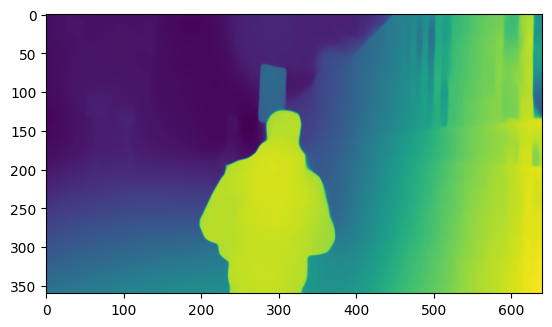

In [ ]:
plt.imshow(depth_map)
# plt.show()

In [1]:
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

NameError: name 'results' is not defined

In [ ]:
import numpy as np

def calculate_object_depth(depth_map, x_min, y_min, x_max, y_max, confidence_threshold=0.7):
    # Convert bounding box coordinates to integers
    x_min = int(x_min)
    y_min = int(y_min)
    x_max = int(x_max)
    y_max = int(y_max)

    # Check if confidence is above the threshold
    if confidence >= confidence_threshold:
        # Extract the depth values corresponding to the bounding box coordinates
        depth_values = depth_map[y_min:y_max, x_min:x_max]  # Assuming depth_map is a numpy array

        # Calculate the average depth value within the bounding box
        object_depth = np.mean(depth_values) if depth_values.size > 0 else 0  # Handling case where depth_values is empty

        return object_depth
    else:
        # If confidence is below the threshold, return None
        return 0


In [ ]:
# Assuming depth_map is your depth map data and objects_info is obtained from the previous code snippet
depth_threshold = 20  # Define a threshold distance in meters

# Iterate through each detected object
for box, cls, confidence in zip(boxes, classes, confidences):
    # Extract bounding box coordinates
    x_min, y_min, x_max, y_max = box

    # Calculate the depth information for the object (you may need to adjust this based on your depth map format)
    object_depth = calculate_object_depth(depth_map, x_min, y_min, x_max, y_max)

    # Check if the object is too close based on the threshold distance
    if object_depth > depth_threshold:
        # Print a message indicating that the object is too close
        print(f"Object of class {names[cls]} is too close at depth")
    # else:
    #   print(object_depth," ",names[cls])


Object of class person is too close at depth
